# 2. Analysis of multiple cakes

## 2.1. Averaging cakes for a better fit

#### Import required libraries

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum

In [2]:
# Sometimes setting the figsize in the first cell doesnt work so this call is in a second cell.
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

Sometimes it may be desirable or necessary to average the data from multiple cakes to improve the signal to noise ratio. `xrdfit` has a simple interface to achieve this.

To start, we load a data file in the same way as before:

Diffraction pattern successfully loaded from file.


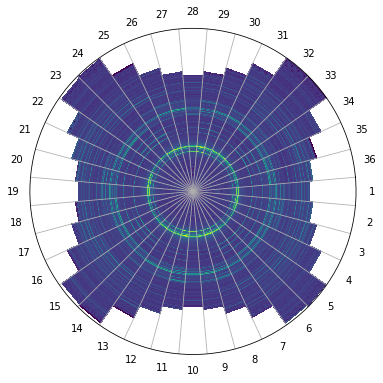

In [3]:
spectral_data = FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)
spectral_data.plot_polar()

### 2.1.1 Adding together cake intensities

We can plot the spectrum of multiple cakes on the same plot by providing a list of the desired cake numbers.

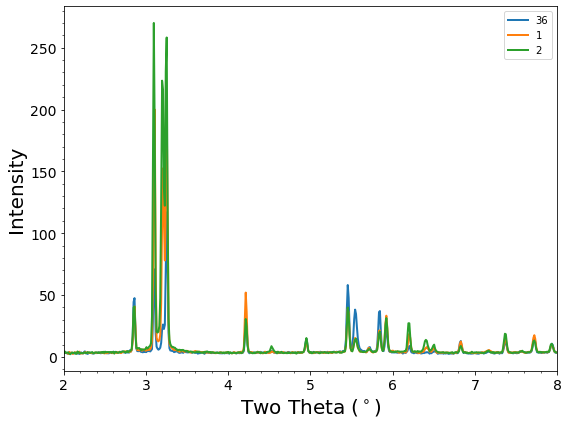

In [4]:
spectral_data.plot([36, 1, 2], x_range=(2, 8))

In order to improve the quality of the analysed dataset we may want to sum multiple adjacent cakes to smooth the signal. This will increase the peak height but will also increase the noise floor.

We can do this by specifying the merge cakes parameter and the intensities of the specified cakes will be summed:

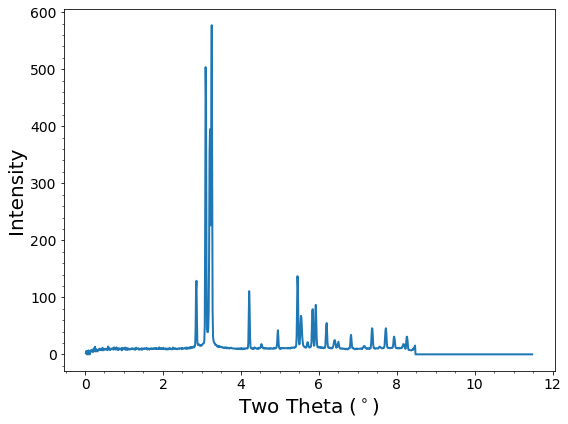

In [5]:
spectral_data.plot([36, 1, 2], merge_cakes=True)

Notice how the intensity compares to the unmerged cakes above - it is the sum of all of the cakes.

Since it is not always easy to visualise which cakes number refers to which cake, there is a helper method `highlight_cakes` which will plot a schematic of the diffraction pattern, highlighting which cakes have been selected.

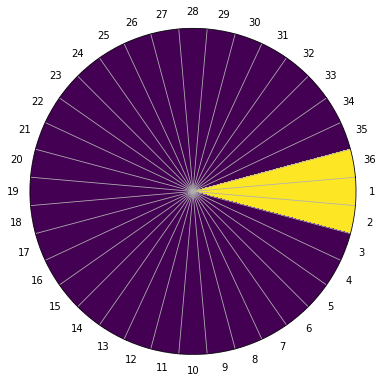

In [6]:
spectral_data.highlight_cakes([36, 1, 2])

Note that it is not necessary to only fit adjacent cakes, any combination may be chosen. Which cakes you choose to fit wil depend on having an understanding of the underlying mechanism of the scattering and your material.

Fitting peaks in merged cakes requires specifying multiple cakes in the fit method but otherwise is the same syntax as fitting a single cake .

Fitting complete.


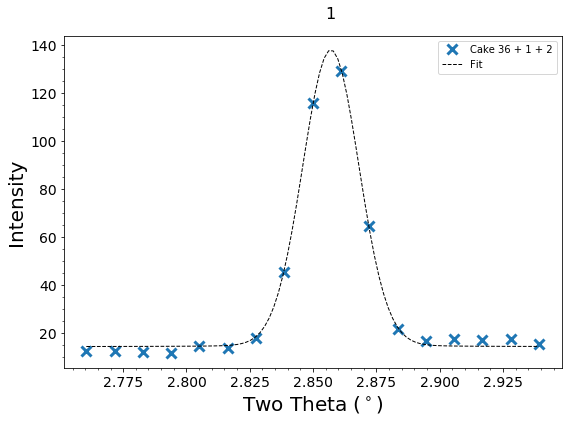

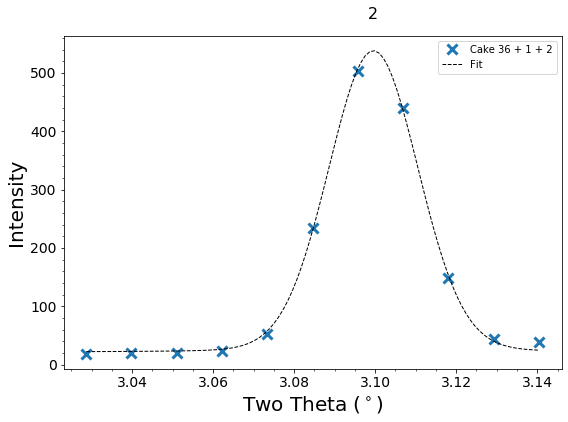

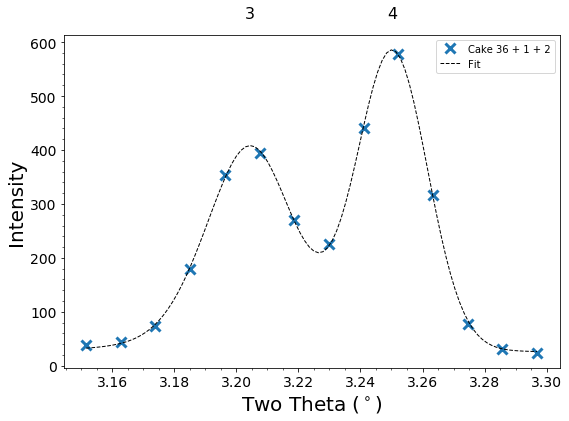

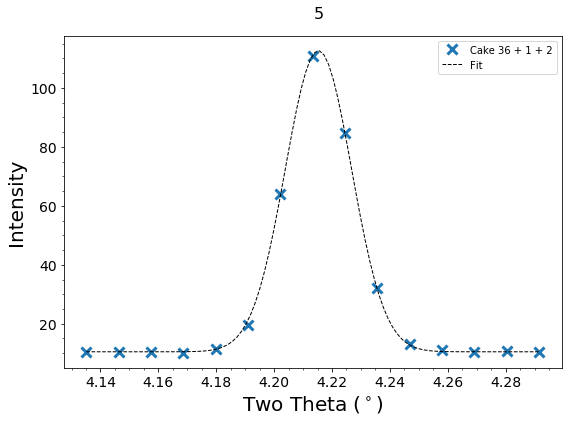

In [7]:
peak_params = [PeakParams((2.75, 2.95), '1'), 
               PeakParams((3.02, 3.15), '2'), 
               PeakParams((3.15, 3.30), ['3', '4'],  [(3.19, 3.22,), (3.24, 3.26)]),
               PeakParams((4.13, 4.30), '5')]

spectral_data.fit_peaks(peak_params, [36, 1, 2], merge_cakes=True)

for fit in spectral_data.fitted_peaks:
    fit.plot()

### 2.1.2 Fitting multiple unmerged cakes

If we select multiple cakes but choose not to merge the cakes then the fit will use all of the individual data points to weight the fit. This means that all of the cakes are plotted separately and the fit attempts to find a middle ground between them. It is not clear to the author whether this produces equivalent fits to merging the cakes, however this was a feature requested by researchers who believed it gave better results for certain data sets.

Fitting complete.


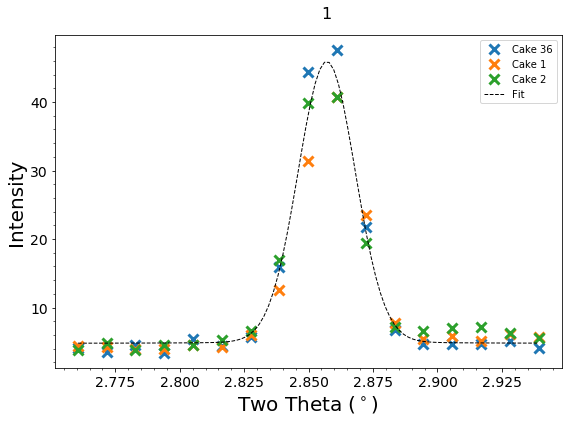

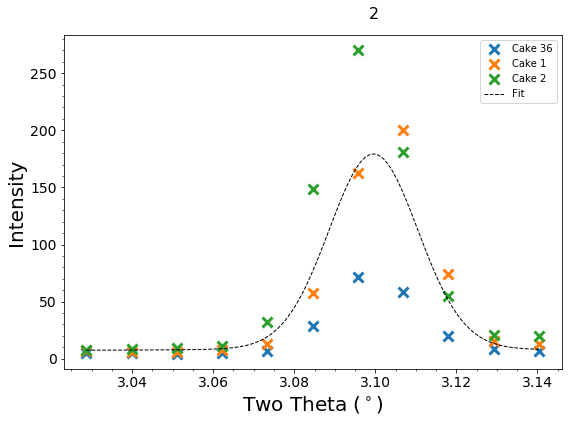

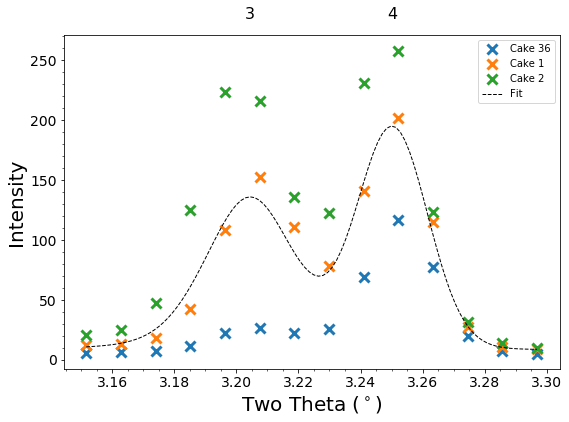

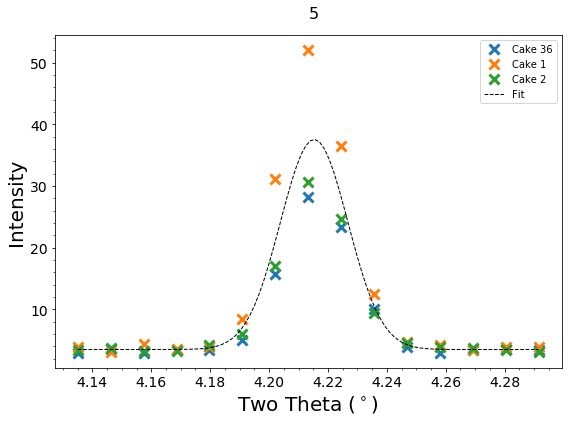

In [8]:
spectral_data.fit_peaks(peak_params, [36, 1, 2], merge_cakes=False)

for fit in spectral_data.fitted_peaks:
    fit.plot()

Whether averaging is useful will depend on the nature of your data. If you have a spherically symmetric diffraction pattern or a pattern with large homogeneous regions then averaging can reduce the effect of noise. However, if the underlying diffraction pattern is not spherically symmetric and is relatively well resolved than averaging will just result in a blurring of the signal.

## 2.2. Fitting multiple cakes separately


It may be the case that you want to fit multiple cakes in the same spectrum separately. `xrdfit` does not have a method to do this directly but it is easy to do with a Python loop.

In [9]:
spectral_data = FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)

peak_params = [PeakParams((2.75, 2.95), '1'), 
               PeakParams((3.02, 3.15), '2'), 
               PeakParams((3.15, 3.30), ['3', '4'],  [(3.19, 3.22,), (3.24, 3.26)]),
               PeakParams((4.13, 4.30), '5')]

fitted_cakes = []
cakes_to_fit = [1, 2, 3, 4, 5]

for cake_number in cakes_to_fit:
    spectral_data.fit_peaks(peak_params, cake_number)
    fitted_cakes.append(spectral_data.fitted_peaks)

Diffraction pattern successfully loaded from file.
Fitting complete.
Fitting complete.
Fitting complete.
Fitting complete.
Fitting complete.


We have to extract the fitted peaks from the `FitSpectrum` object each fit because the default behaviour is to overwrite `FitSpectrum.fitted_peaks` each time the `fit_peaks` method is run. This is done so that when the user is iterating the `PeakParams` to get the best fit, there isn't a large number of similar but different fits.

The above code has generated the list *fitted_cakes* which is a list of list of PeakFits, the first list dimension is cake number, the second is the peak number.

To plot the first peak in each cake would then be:

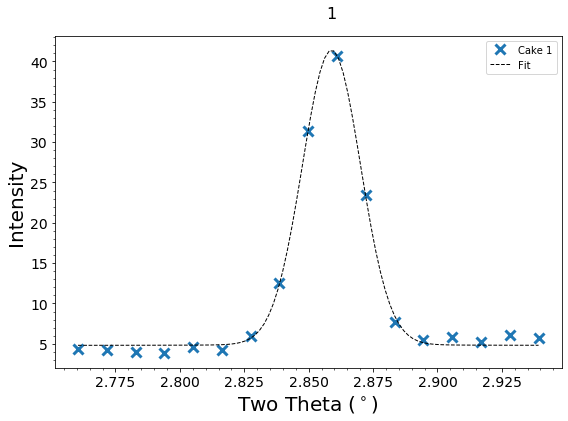

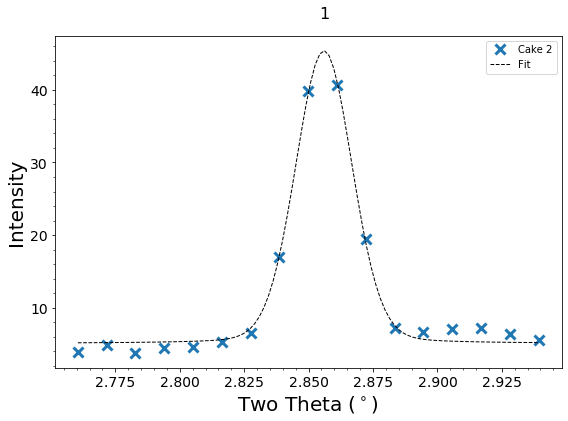

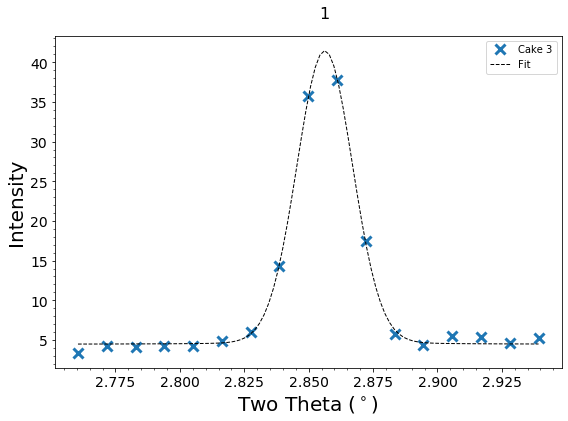

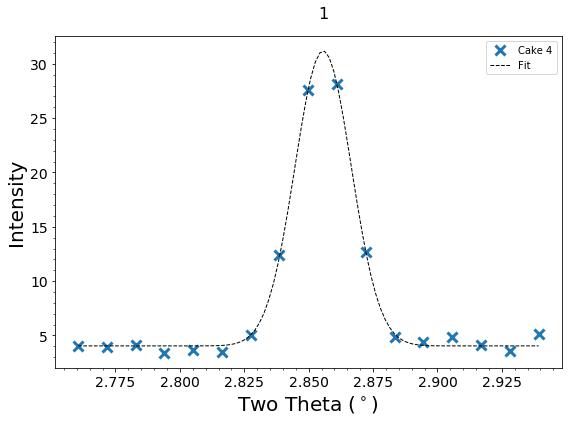

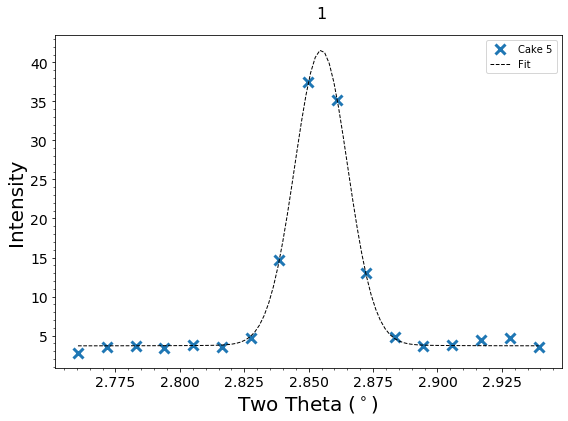

In [10]:
for cake_spectrum in fitted_cakes:
    cake_spectrum[0].plot()

Note that the cake number is given in the legend but this doesnt do much to distinguish the plots. We can supply the optional *title* parameter to the plot method to override the default title:

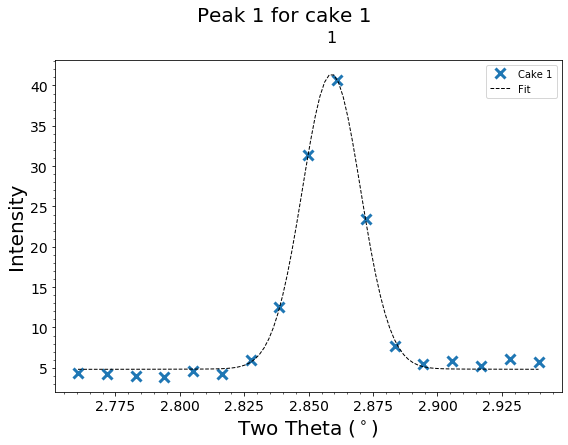

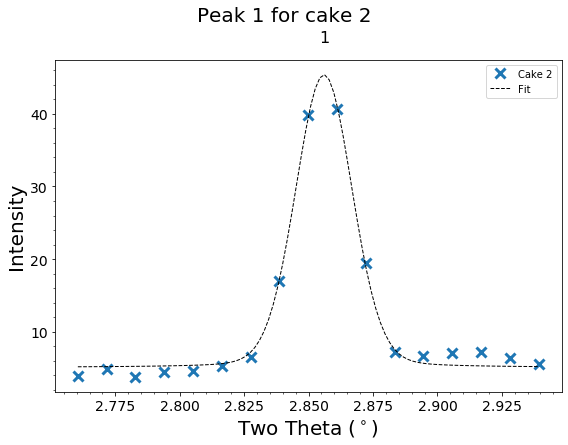

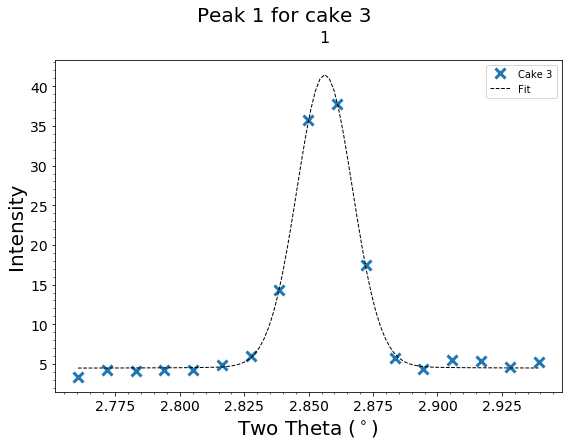

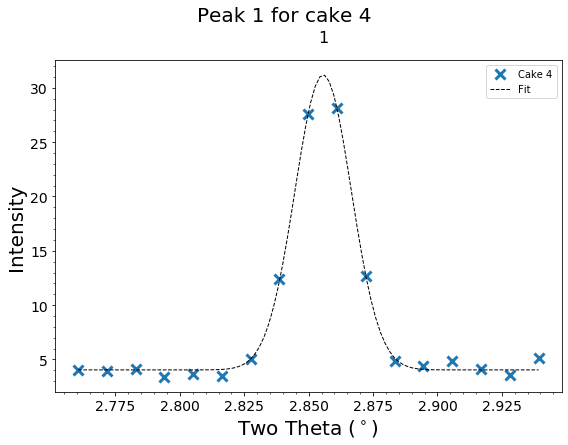

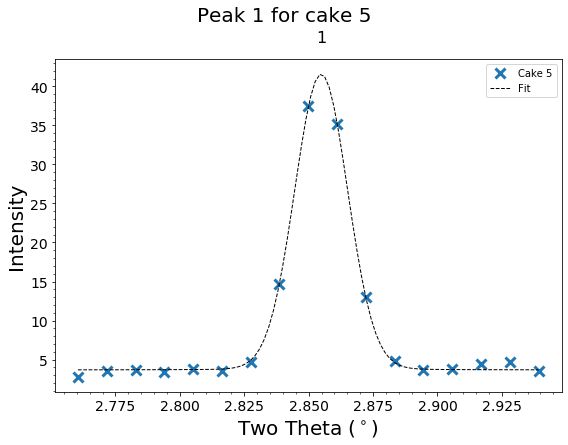

In [11]:
for cake_number, cake_spectrum in enumerate(fitted_cakes):
    cake_spectrum[0].plot(title=f"Peak 1 for cake {cake_number + 1}")